In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("../datasets/WineQT.csv")
df= df.drop(columns="Id")


#### Data Cleaning

In [3]:
# check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

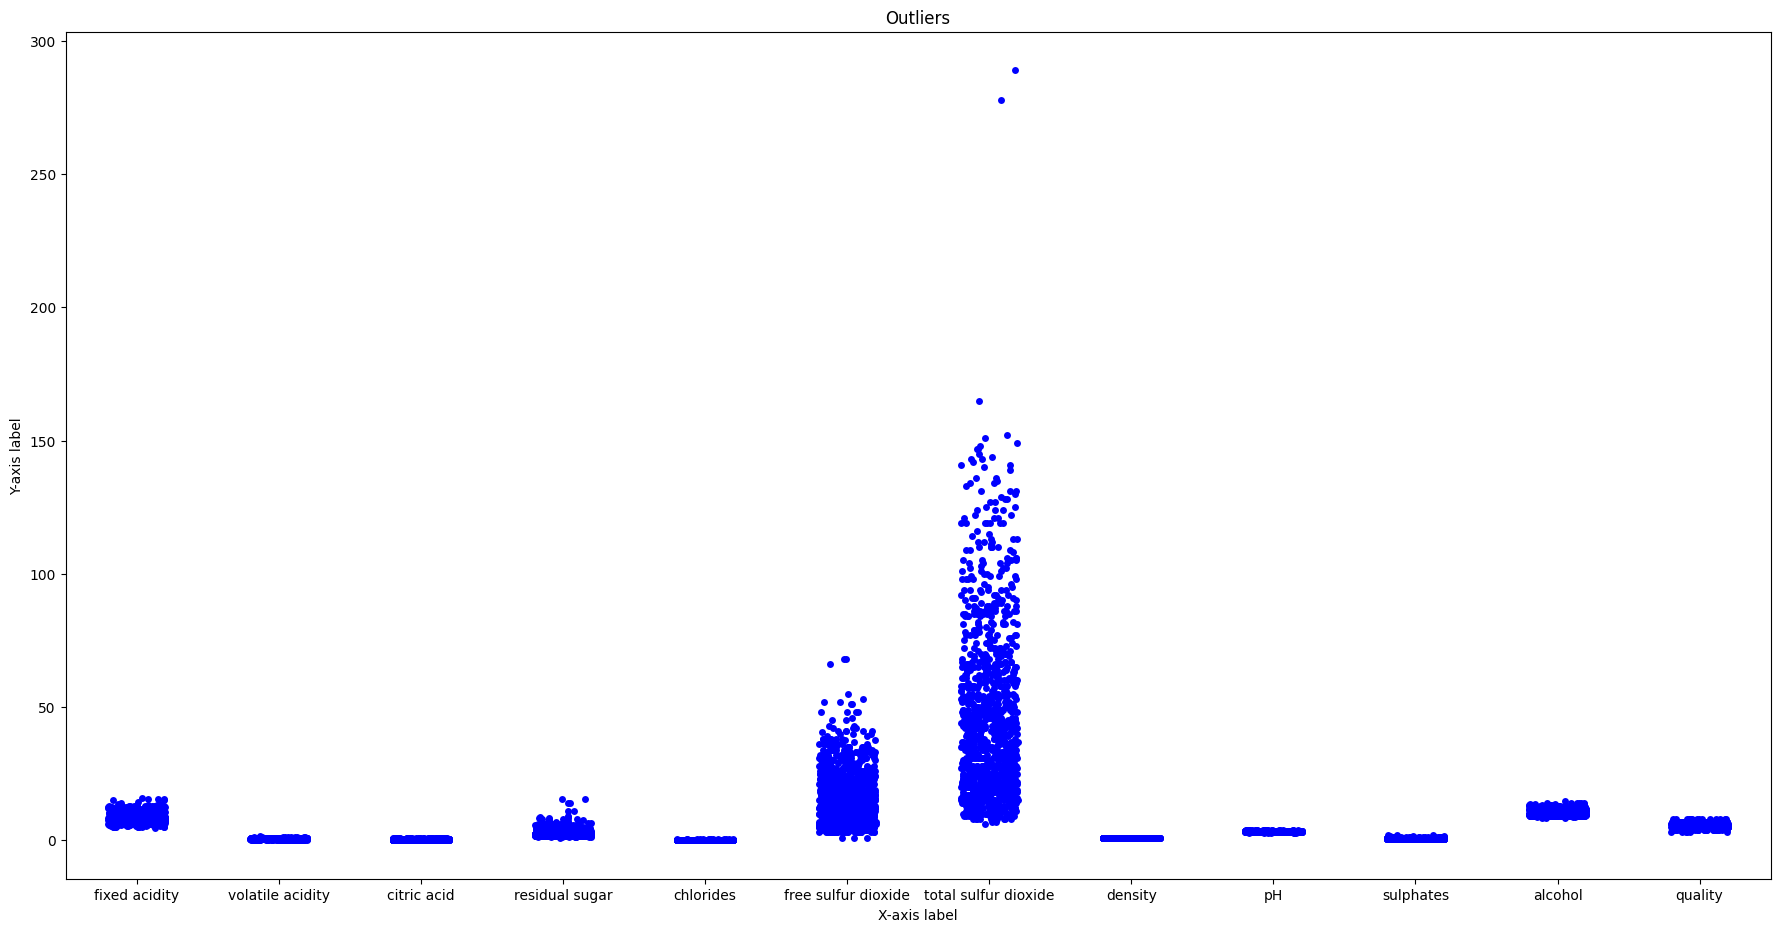

In [4]:
# Visualising outliers
import seaborn as sns
plt.figure(figsize=(22, 11))

sns.stripplot(data=df, color="blue", jitter=0.2, size=5)

plt.title("Outliers")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")

plt.show()

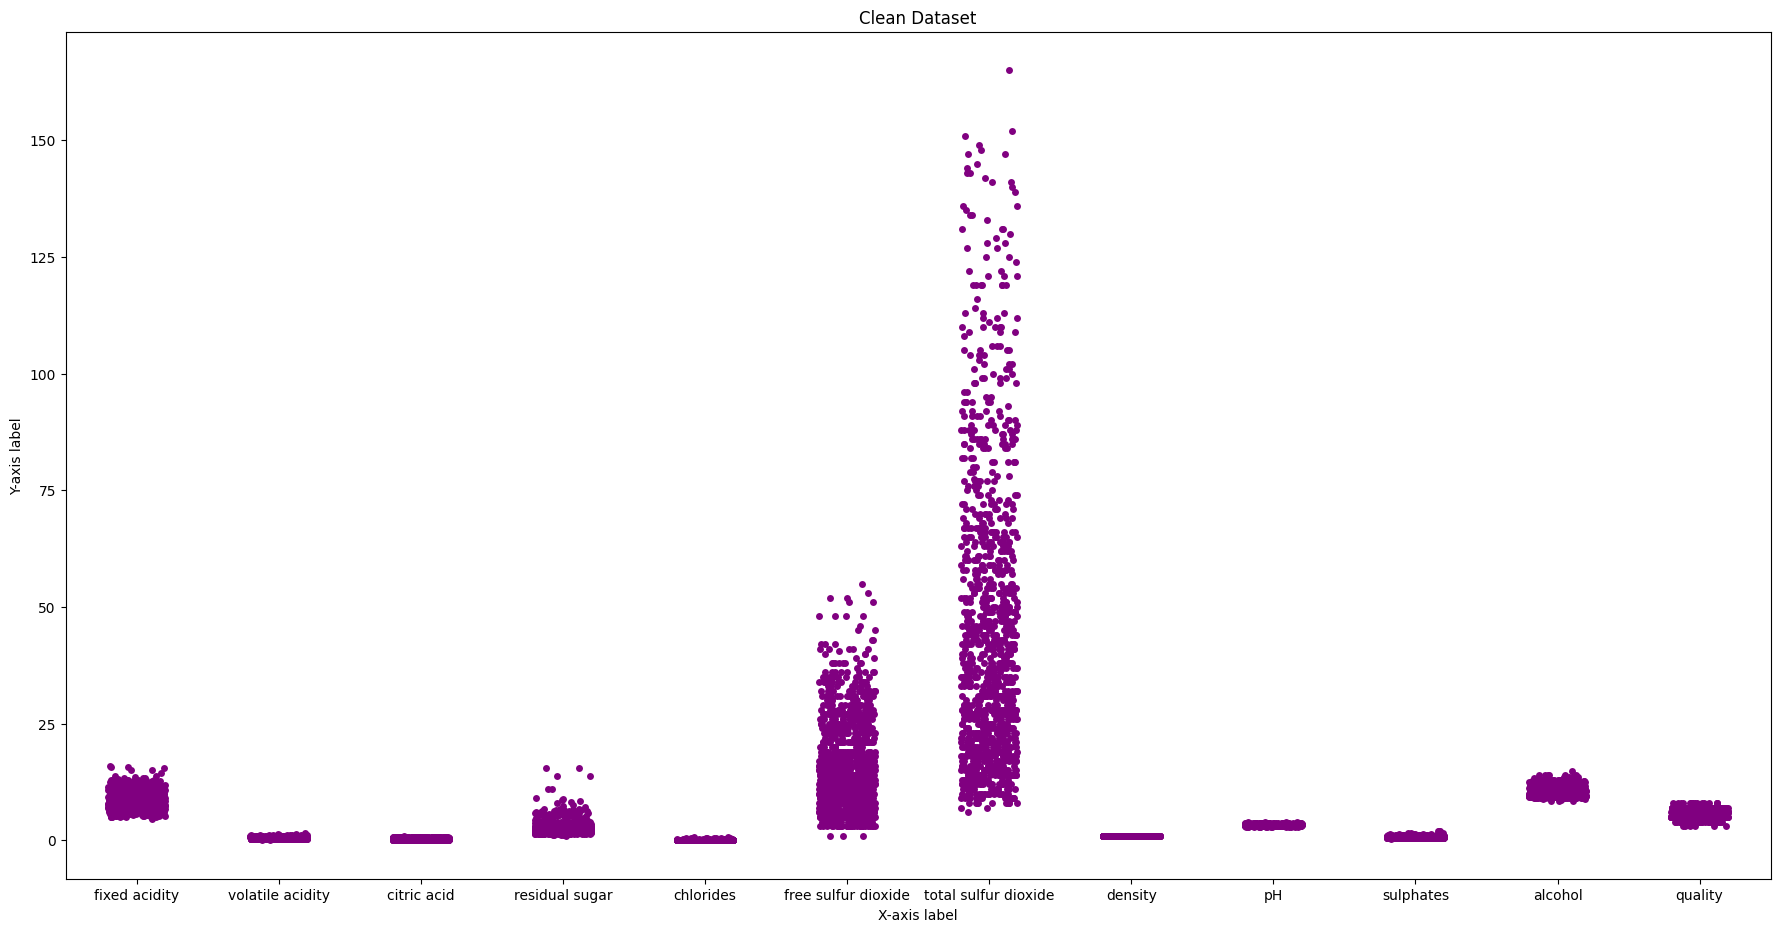

In [5]:
# eliminating outliers manually 
outliers = df[(df['total sulfur dioxide'] > 250)|(df['free sulfur dioxide'] > 55)]
df = df.drop(outliers.index)

plt.figure(figsize=(22, 11))

sns.stripplot(data=df, color="purple", jitter=0.2, size=5)

plt.title("Clean Dataset")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")

plt.show()

In [6]:
X = df.drop(columns=['quality']) 
y = df['quality'] 
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25)

#### Preprocessing

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


#### Model Training

In [8]:
svr= SVR(kernel='linear', epsilon=0.2, C = 1.5)
svr.fit(X_train_scaled,y_train)

ypred= svr.predict(X_test_scaled)
ypred_rounded = np.round(ypred)


#### Evaluation

Mean Squared Error: 0.3310855254831319
R-squared: 0.44706756708266737
Mean Abslute Error: 0.4419249203447334


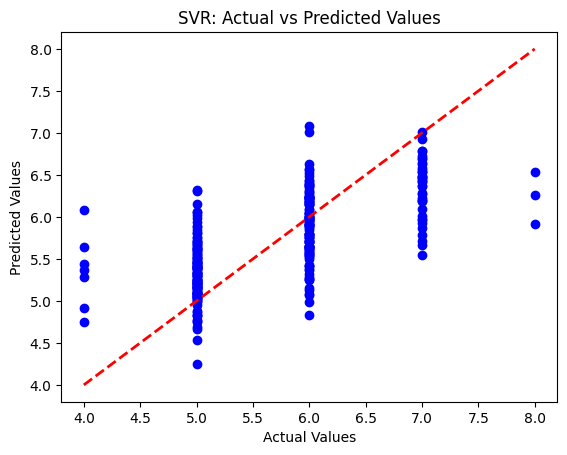

In [9]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
mae = mean_absolute_error(y_test, ypred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Abslute Error: {mae}")

import matplotlib.pyplot as plt

plt.scatter(y_test, ypred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted Values')
plt.show()



In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly']
}

svm = SVC()

# grid search automates hypertuning
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

# predictions with the best model
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, ke

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f